In [7]:
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import pandas as pd
import Preprocessing #my module
from Preprocessing import *

In [8]:
dataset = h5py.File("OPPAC_Data/simu_HDF_thistimeforReal.h5", 'r') #load data
num_diodes = dataset['Num_diodes'][...] #separate the data into each key within the data file
x_pos = (dataset['Xpos'][...])/100 #puts the scale into mm
y_pos = (dataset['Ypos'][...])/100
#print(x_pos)
#print(y_pos)
histgrid = dataset['histgrid'][...]
histgrid = histgrid[:-10,:,:] #redefine the shape and size of histgrid by removing the last 10 events (they are bad)
output = np.vstack((x_pos,y_pos)) #define new, single variable for x and y position
print(output)
output = np.transpose(output) #original definition was sideways, so we transposed it
print(output)
print(histgrid.shape)
dataset.close()

[[-12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12. -12.
  -12. -12. -16. -16. -16. -16. -16. -16. -16. -16. -16. -16. -16. -16.
  -16. -16. -16. -16. -20. -20. -20. -20. -20. -20. -20. -20. -20. -20.
  -20. -20. -20. -20. -20. -20. -20. -24. -24. -24. -24. -24. -24. -24.
  -24. -24. -24. -24. -24. -24. -24. -24. -24. -24. -28. -28. -28. -28.
  -28. -28. -28. -28. -28. -28. -28. -28. -28. -28. -28. -28. -28. -32.
  -32. -32. -32. -32. -32. -32. -32. -32. -32. -32. -32. -32. -32. -32.
  -32. -32. -36. -36. -36. -36. -36. -36. -36. -36. -36. -36. -36. -36.
  -36. -36. -36. -36. -36. -40. -40. -40. -40. -40. -40. -40. -40. -40.
  -40. -40. -40. -40. -40. -40. -40. -40.  -4.  -4.  -4.  -4.  -4.  -4.
   -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -8.  -8.  -8.  -8.
   -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.  -8.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  12.  1

In [9]:
#make sure there are no NaNs (FCNN gets angry when NaNs)
assert not(np.any(np.isnan(histgrid)))

[[-12. -12.]
 [-12. -12.]
 [-12. -12.]
 ...
 [  8.   8.]
 [  8.   8.]
 [  8.   8.]]
(338922, 132)
(338922, 2)


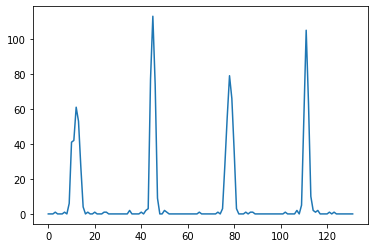

In [10]:
all_data, all_labels = data_compile(histgrid, output)
plt.plot(all_data[0,:])
print(all_labels)
#to make sure everything is the correct shape
print(all_data.shape)
print(all_labels.shape)

In [6]:
all_data = normalize(all_data,axis = 1) #Normalize samples individually to unit norm.
print(np.max(all_data))

0.8395246220687987


In [9]:
#define all_labels and all_data as df's to better view rows and add column
all_labels = pd.DataFrame(all_labels)
all_data = pd.DataFrame(all_data)
all_data["sum"] = np.sum(all_data, axis = 1) #column added to find rows with only 0's
print(all_data)
print(all_labels)
#confirming number of initial entries
print(len(all_labels))
print(len(all_data))

#find all the locations in all_data (by index) where the only values are 0 across the diodes
remove_labels = list(all_data[all_data["sum"] == 0].index)
print(len(remove_labels))

#added these to ensure I have unshuffled versions of the data and labels for finding locations with larger error
unshuf_labels = all_labels.drop(all_labels.index[remove_labels])
unshuf_data = all_data[all_data["sum"] != 0]

#lets all_labels and all_data start with the same indices and values as their unshuffled counterparts
all_labels = unshuf_labels
unshuf_labels = unshuf_labels.to_numpy() #dfs are hard to graph with, so I converted to np.arrays for future use
all_data = unshuf_data
unshuf_data = unshuf_data.to_numpy()

#confirm new number of entries (should be len(remove_labels) less than the intital value)
print(len(all_labels))
print(len(all_data))

#must remove the sum column before using in FCNN; otherwise it will treat it as a data point 
del all_data['sum']

               0         1         2         3    4    5         6         7  \
0       0.000000  0.000000  0.000000  0.003812  0.0  0.0  0.000000  0.003812   
1       0.000000  0.003912  0.000000  0.000000  0.0  0.0  0.000000  0.003912   
2       0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
3       0.000000  0.000000  0.003955  0.007909  0.0  0.0  0.007909  0.000000   
4       0.008882  0.000000  0.000000  0.000000  0.0  0.0  0.004441  0.000000   
...          ...       ...       ...       ...  ...  ...       ...       ...   
338917  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
338918  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.003650  0.000000   
338919  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   
338920  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.002713   
338921  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   

               8         9  ...       1

In [10]:
dataset = np.concatenate((all_data, all_labels), axis=1)
#puts the x,y labels at the end of each data row

In [11]:
print(dataset.shape)  #confirm it is the correct shape

(338636, 134)


In [12]:
np.save("recomplied_dataset_fixed" , dataset)
print(dataset)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.20000000e+01 -1.20000000e+01]
 [ 0.00000000e+00  3.91237385e-03  0.00000000e+00 ...  0.00000000e+00
  -1.20000000e+01 -1.20000000e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -1.20000000e+01 -1.20000000e+01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   8.00000000e+00  8.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   8.00000000e+00  8.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   8.00000000e+00  8.00000000e+00]]


In [13]:
#making sure it works
new_dataset = np.load("OPPAC_Data/recomplied_dataset_fixed.npy")

In [14]:
print(new_dataset.shape)

(338636, 134)
